1
1
1
1
1.046469666
1.044947754
1.048715042
1.056303854
1.109121288
1.107706667
1.097846976
1.101474491
1.06277872
1.096956163
1.066200261
1.071425026
1.06853422
1.069144882
1.057267739
1.056874328
1.081262376
1.080079914
1.074580819
1.076043693
1.250514984
1.258327406
1.250482724
1.303616355
1.248703238
1.246094612
1.195723665
1.189579543
1.202368759
1.277988772
1.158447513
1.159648563
1.210128105
1.207891607
1.161759297
1.156311054
1.221121667
1.216981306
1.179059897
1.170361225
1.393359136
1.400666465
1.367047725
1.398143636
[[1.         1.         1.         1.        ]
 [1.04646967 1.04494775 1.04871504 1.05630385]
 [1.10912129 1.10770667 1.09784698 1.10147449]
 [1.06277872 1.09695616 1.06620026 1.07142503]
 [1.06853422 1.06914488 1.05726774 1.05687433]
 [1.08126238 1.08007991 1.07458082 1.07604369]
 [1.25051498 1.25832741 1.25048272 1.30361635]
 [1.24870324 1.24609461 1.19572367 1.18957954]
 [1.20236876 1.27798877 1.15844751 1.15964856]
 [1.2101281  1.20789161 1.1617593  1.156311

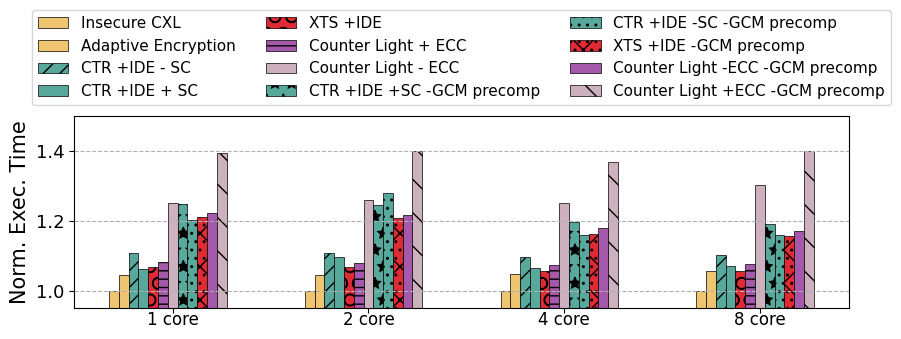

In [56]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=4
x=np.arange(N) 
xclicks=[
    '1 core', '2 core', '4 core', '8 core'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ablation.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(12, 4)
print(b1)


allfigsize=(10,2.5)     
width=0.05
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 12.0 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR +IDE - SC', color='#59a89c',  hatch="//" , edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR +IDE + SC', color='#59a89c' , edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='XTS +IDE', color='#e02b35', hatch="O",edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light + ECC',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )

plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light - ECC', color='#CEB1BE', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR +IDE +SC -GCM precomp', color='#59a89c', hatch="*", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR +IDE -SC -GCM precomp', color='#59a89c',  hatch="..", edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='XTS +IDE -GCM precomp', color='#e02b35', hatch="x..",edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light -ECC -GCM precomp', color='#a559aa', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Counter Light +ECC -GCM precomp',  color='#CEB1BE', hatch="\\", edgecolor='black', linewidth=0.5, align='center' )

########################################################

########################################################

# plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.5)
plt.yticks([1.0,1.2,1.4],fontsize=13)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.59), fontsize=11)    
plt.savefig('ablation.pdf',bbox_inches = 'tight')    
plt.show()